# CS5228 Rental Prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import History

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score


# load data
train_data = pd.read_csv('./data/processed/train.csv')
test_data = pd.read_csv('./data/processed/test.csv')

X, y = train_data.drop(columns='monthly_rent'), train_data['monthly_rent'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='swish'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='swish'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam')

In [2]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=128, verbose=1)

Epoch 1/500


2023-11-06 22:42:08.300679: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


325/325 [==============================] - 1s 1ms/step - loss: 1171.3805 - val_loss: 449.2515
Epoch 2/500
325/325 [==============================] - 0s 904us/step - loss: 421.9248 - val_loss: 405.9771
Epoch 3/500
325/325 [==============================] - 0s 843us/step - loss: 402.8396 - val_loss: 398.1341
Epoch 4/500
325/325 [==============================] - 0s 885us/step - loss: 398.1162 - val_loss: 394.7028
Epoch 5/500
325/325 [==============================] - 0s 864us/step - loss: 394.7775 - val_loss: 392.6191
Epoch 6/500
325/325 [==============================] - 0s 849us/step - loss: 392.3755 - val_loss: 390.3969
Epoch 7/500
325/325 [==============================] - 0s 863us/step - loss: 390.5495 - val_loss: 388.2254
Epoch 8/500
325/325 [==============================] - 0s 954us/step - loss: 389.3362 - val_loss: 390.1674
Epoch 9/500
325/325 [==============================] - 0s 956us/step - loss: 388.1838 - val_loss: 386.0315
Epoch 10/500
325/325 [============================

In [3]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


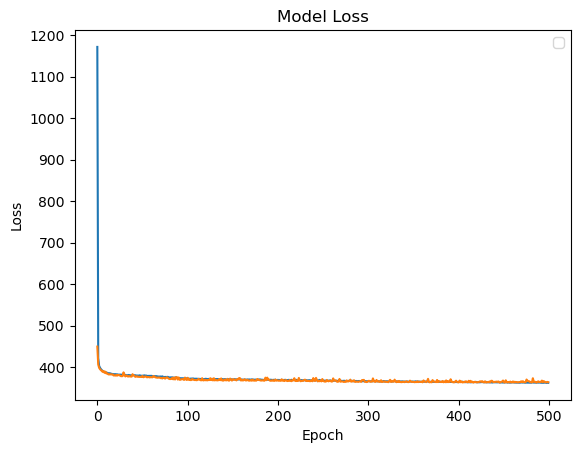

In [4]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [5]:
predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0],)


557/557 [==============================] - 0s 329us/step
Root Mean Squared Error: 486.1721403903251
Mean Absolute Error: 363.5567833280724
1300/1300 [==============================] - 0s 348us/step


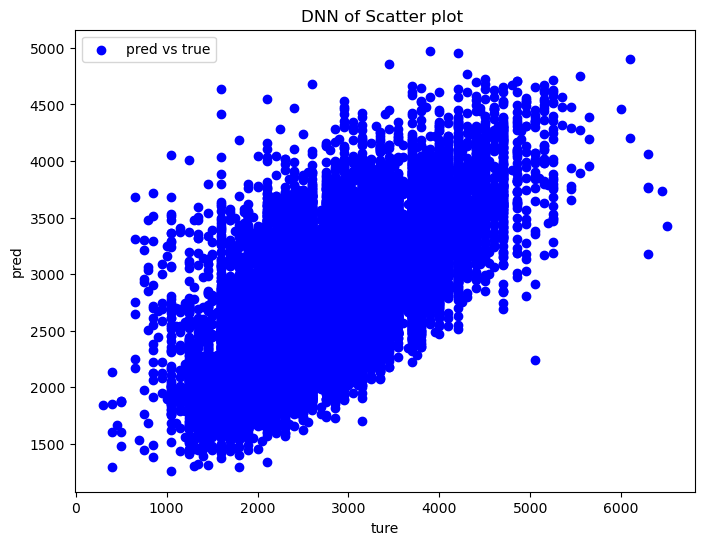

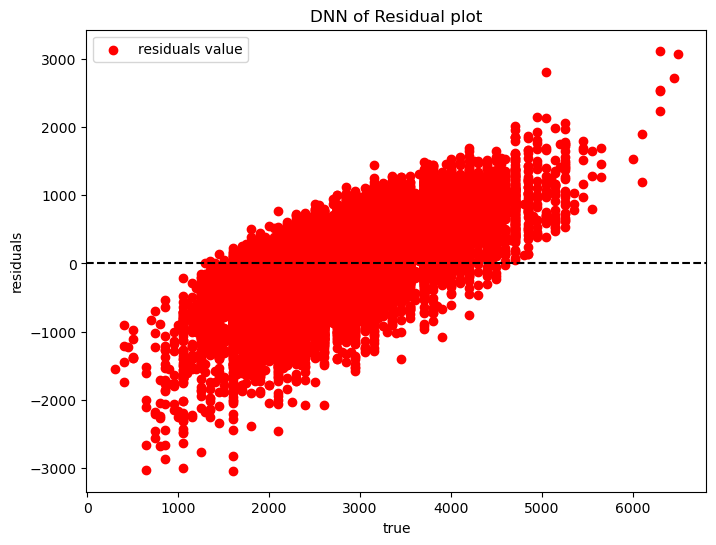

In [6]:
#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='pred vs true')
plt.xlabel('ture')
plt.ylabel('pred')
plt.legend()
plt.title('DNN of Scatter plot ')
plt.show()

# Residual plot
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, color='red', label='residuals value')
plt.xlabel('true')
plt.ylabel('residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title('DNN of Residual plot')
plt.show()

In [7]:
name_DNN = 'DNN'

y_pred = model.predict(test_data)

y_pred = y_pred.reshape(-1)
result_df = pd.DataFrame({
        'Id': range(len(y_pred)),
        'Predicted': y_pred
    })
save_path = './data/predictions/' + name_DNN + '.csv'
result_df.to_csv(save_path, index=False)
print(f'{name_DNN} training result saved.\n')

938/938 [==============================] - 0s 344us/step
DNN training result saved.

